<a href="https://colab.research.google.com/github/Akshu2410/Data-Analytics-Projects/blob/main/Uber_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Read Data for Analysis**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import os

In [39]:
os.listdir("/")

['proc',
 'home',
 'sys',
 'lib',
 'mnt',
 'sbin',
 'lib32',
 'tmp',
 'boot',
 'etc',
 'srv',
 'run',
 'var',
 'opt',
 'dev',
 'media',
 'root',
 'usr',
 'lib64',
 'bin',
 'libx32',
 'content',
 'kaggle',
 '.dockerenv',
 'datalab',
 'tools',
 'NGC-DL-CONTAINER-LICENSE',
 'cuda-keyring_1.0-1_all.deb']

In [40]:
uber_data=pd.read_csv('uber-raw-data-janjune-15_sample.csv')

In [41]:
uber_data.shape

(100000, 4)

In [42]:
type(uber_data)

pandas.core.frame.DataFrame

In [43]:
uber_data.duplicated().sum()

54

remove duplicates and update table

In [44]:
uber_data.drop_duplicates(inplace=True)

In [45]:
uber_data.duplicated().sum()

0

In [46]:
uber_data.shape

(99946, 4)

In [47]:
uber_data.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [48]:
uber_data.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [49]:
uber_data['Pickup_date'] = pd.to_datetime(uber_data['Pickup_date'])

In [50]:
type(uber_data['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
uber_data.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

**Which month has max uber pickups in New York City**

In [52]:
uber_data['month']=uber_data['Pickup_date'].dt.month_name()

In [53]:
month_count =uber_data['month'].value_counts()

<Axes: xlabel='month'>

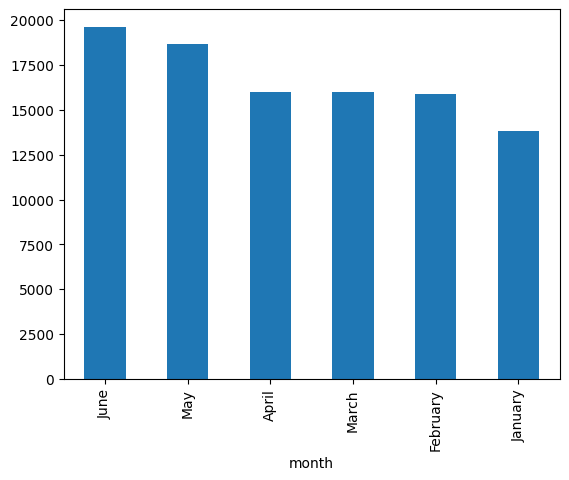

In [54]:
month_count.plot(kind='bar')

### **Conclusion** - June has highest Number of pickups

**What are total pickups on each day for each month**

In [55]:
uber_data['Day']=uber_data['Pickup_date'].dt.day_name()

In [56]:
pivot = pd.crosstab(index=uber_data['month'],columns=uber_data['Day'])

<Axes: xlabel='month'>

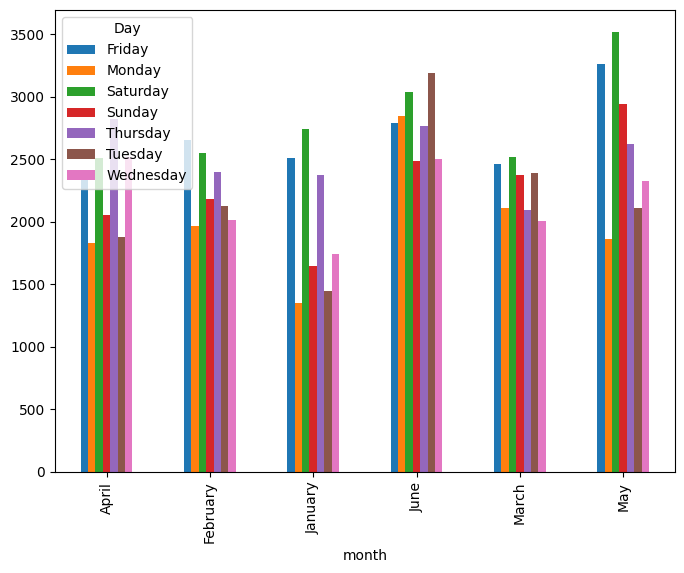

In [57]:
pivot.plot(kind='bar', figsize=(8,6))